Mean Squared Error: 56.80838184708134
Regression Coefficients: [1.00472879]


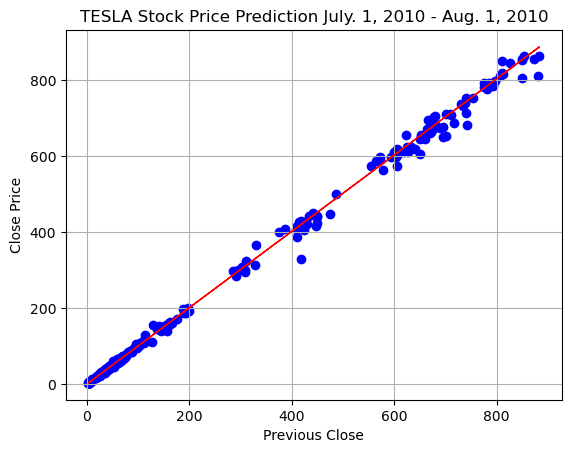

Prediction Percentage Score (R-squared): 99.83%
Prediction Accuracy: 44.51%


In [42]:
#I chose Case 1, to predict stock market prices for Tesla. As this is supervised machine learning we can only use two methods.
#Either we choose classification, which is better for image classification, identity fraud detection and so on. Or we can choose
#Regression, which is more helpful in this case as we are predicting prices. We are forecasting the stockmarket prices for tesla,
#meaning we are making a prediction. Thus, I choose an algorithm based on regression.

### Algorithm Below

#needed imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Loading the data from TESLA.csv through the url # Get the specific date from the user as input
# Can also use this to prompt input from user
# user_date = input("Enter the date in the format 'YYYY-MM-DD': ")

url = 'https://raw.githubusercontent.com/atikagondal/Assignment-2-dave3625-202323/main/TSLA.csv'
data = pd.read_csv(url, sep=',')

data.head()

# Data preprocess
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

# Creating a feature for closing price
data['Previous_Close'] = data['Close'].shift(1)

# Dropping rows with missing values
data = data.dropna()

# Defining features (X) and target (y)
X = data[['Previous_Close']]
y = data['Close']

# Spliting data: training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Created and trained the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print MSE and regression coefficients
print(f"Mean Squared Error: {mse}")
print(f"Regression Coefficients: {model.coef_}")

# attempted to visualize the predictions
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=1)
plt.xlabel('Previous Close')
plt.ylabel('Close Price')
plt.title('TESLA Stock Price Prediction July. 1, 2010 - Aug. 1, 2010')
plt.grid(True)
plt.show()

# Calculate the prediction percentage score, not sure if done correctly
r_squared = r2_score(y_test, y_pred) * 100

# Print the prediction percentage score
print(f"Prediction Percentage Score (R-squared): {r_squared:.2f}%")
#Calculate the precision
mse = mean_squared_error(y_test, y_pred)
prediction_percentage_score = 100 - (mse / y_test.mean()) * 100

print(f"Prediction Accuracy: {prediction_percentage_score:.2f}%")

